In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import re 
import nltk 

from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from time import time

# from sklearn import svm
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
import pandas as pd
import io
  
df = pd.read_csv(r'C:\Users\Acer\Desktop\NLP project/train.csv')
print(df)

                                       COMMENT_ID                AUTHOR  \
0     LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU             Julius NM   
1             z13jhp0bxqncu512g22wvzkasxmvvzjaz04       ElNino Melendez   
2             z13fwbwp1oujthgqj04chlngpvzmtt3r3dw                GsMega   
3             z13lfzdo5vmdi1cm123te5uz2mqig1brz04        ferleck ferles   
4             z12avveb4xqiirsix04chxviiljryduwxg0           BeBe Burkey   
...                                           ...                   ...   
1152  _2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q           ThirdDegr3e   
1153  _2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg      Ysobel Schofield   
1154  _2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI  Sabina Pearson-Smith   
1155  _2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs         jeffrey jules   
1156  _2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0        Aishlin Maciel   

                            DATE  \
0            2013-11-07T06:20:48   
1            2013-11-09T08:

Preview of CLASS in the dataset

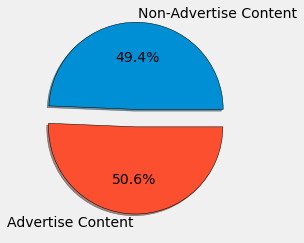

In [3]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

tot = df.shape[0]
num_toxic = df[df.CLASS == 0].shape[0]

slices = [num_toxic/tot,(tot - num_toxic)/tot]
labeling = ['Non-Advertise Content','Advertise Content']
explode = [0.2,0]
plt.figure(figsize=(4,8))
plt.pie(slices,explode=explode,shadow=True,autopct='%1.1f%%',labels=labeling,wedgeprops={'edgecolor':'black'})
plt.tight_layout()
plt.show()

In [4]:
df['length_train'] = df['CONTENT'].str.len()

In [5]:
combi = df.append(df,ignore_index=True)

In [6]:
def remove_pattern(input_txt,pattern):
  r= re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,'',input_txt)
  return input_txt

In [7]:
#removes @user
combi['tidy_content'] = np.vectorize(remove_pattern)(combi['CONTENT'],"@[\w]*")
#removes extra letters 
combi['tidy_content'] = combi['tidy_content'].str.replace("[^a-zA-z#]"," ")
#removes all those words with size less than 3 
combi['tidy_content']= combi['tidy_content'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3])) 

<ipython-input-7-644dfdc20ca6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_content'] = combi['tidy_content'].str.replace("[^a-zA-z#]"," ")


In [8]:
combi.sample(n=10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,length_train,tidy_content
287,z13cyrkatpfnixkis04cinqqhmbuvhspvqk0k,Pettrus Ortega,2014-09-18T11:35:49,"THIS IS A COMPETITION TO MEET MY IDOLS, IT WOU...",1,136,THIS COMPETITION MEET IDOLS WOULD MEAN MUCH GU...
299,z13byjoiuqvhctxc423ahhxafrizwhfto,tonya parker,2014-09-21T23:01:03,This is the best of the best video in world!!!...,0,73,This best best video world
429,z13oe5si1ouygx2dv22vcrb5qouetpjz404,Brian Brai,2015-05-28T08:57:27.399000,Omg﻿,0,4,
575,z12gctfjtpq4ybcdx23sshorsxrsx3ave,Victor Gamer,2015-04-13T02:00:20.152000,View 851.247.920<br /><br /> Best youtube Vide...,1,400,View Best youtube Video Subscribe Channel plea...
1417,z12wujphdvrxcbksz23lc3j5xsqadn0cz,Made2Falter,2014-09-09T23:55:30,"Check out our vids, our songs are awesome! And...",1,67,Check vids songs awesome that guarantee
39,z13zz3cjwmztcni0p23ug3vb0pasfvzqc04,Dymetex,2014-01-21T09:03:36,OMG this oldspice spraytan party commercial om...,0,110,this oldspice spraytan party commercial sittin...
414,z13ihroixyvmzvl2h22kclthlnmmxtggl04,Destiny Cable,2015-06-05T03:33:16,PLEASE VOTE FOR ME FOR THE WET SEAL MODEL 2015...,1,155,PLEASE VOTE SEAL MODEL CONTEST INSTAGRAM USERN...
1941,z121i1eqppzph3eod04cixfgwknydnfzq3k,railn j sander,2015-05-26T05:32:15.041000,I guss this song is one of my worst fears in l...,0,116,guss this song worst fears life with someone a...
816,LneaDw26bFtnSSLHdnzuBcuiWsrkKqOQgsyMmAcSnw4,Louis Bryant,NaN,You guys should check out this EXTRAORDINARY w...,1,351,guys should check this EXTRAORDINARY website c...
1161,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,67,should check channel tell what should next


In [9]:
tokenized_tweet = combi['tidy_content'].apply(lambda x: x.split()) #creates a list

In [10]:
tokenized_tweet.head()

0    [anyway, check, this, you[tube], channel, koby...
1                      [shaking, sexy, channel, enjoy]
2                    [watch, vtaRGgvGtWQ, Check, this]
3                                 [Subscribe, channel]
4    [should, check, channel, tell, what, should, n...
Name: tidy_content, dtype: object

In [11]:
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [13]:
combi.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,length_train,tidy_content,tidy_tweet
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,anyway check this you[tube] channel kobyoshi,anyway check this you[tube] channel kobyoshi
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,shaking sexy channel enjoy,shaking sexy channel enjoy
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,watch vtaRGgvGtWQ Check this,watch vtaRGgvGtWQ Check this
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,25,Subscribe channel,Subscribe channel
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,67,should check channel tell what should next,should check channel tell what should next


In [14]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(df['CONTENT'], 
                                                    df['CLASS'], 
                                                    random_state=42)  
           
print('Number of rows in the total set: {}'.format(df.shape))
print('Number of rows in the training set: {}'.format(X_train.shape))
print('Number of rows in the test set: {}'.format(X_test.shape))

Number of rows in the total set: (1157, 6)
Number of rows in the training set: (867,)
Number of rows in the test set: (290,)


In [15]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
print(X_train.shape)
print(training_data.shape)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# making pickle file
import pickle
filename = 'vector_vocabulary.pkl'
pickle.dump(count_vector.vocabulary_, open(filename, 'wb'))

(867,)
(867, 2393)


In [16]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    import pickle
    for learner in learner_list:
        
        print(learner)
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # making pickle file here for my various classifier

        filename = learner.__class__.__name__+".pkl"
        pickle.dump(learner, open(filename, 'wb'))


        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [17]:
# make a list of models
models = [LinearSVC(), 
          RandomForestClassifier(),
         LogisticRegression(), KNeighborsClassifier()]

In [18]:
re = pipeline(models, training_data, y_train, testing_data, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

LinearSVC()
Training LinearSVC
Training LinearSVC finished in 0.00 sec
----------------------------------------------------
RandomForestClassifier()
Training RandomForestClassifier
Training RandomForestClassifier finished in 0.31 sec
----------------------------------------------------
LogisticRegression()
Training LogisticRegression
Training LogisticRegression finished in 0.03 sec
----------------------------------------------------
KNeighborsClassifier()
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.00 sec
----------------------------------------------------


In [19]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [20]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,LinearSVC,0.951724,0.972028,0.932886,0.952055,0.000000,0.997693,1.000000,0.995423,0.997706,0.004022
1,RandomForestClassifier,0.927586,0.957143,0.899329,0.927336,0.052904,0.998847,1.000000,0.997712,0.998855,0.311135
2,LogisticRegression,0.924138,0.970370,0.879195,0.922535,0.000998,0.986159,1.000000,0.972540,0.986079,0.028881
3,KNeighborsClassifier,0.817241,0.970588,0.664430,0.788845,0.068779,0.848904,0.972222,0.720824,0.827858,0.001029


In [21]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.817241,0.957143,0.664430,0.788845,0.000000,0.848904,0.972222,0.720824,0.827858,0.001029
max,0.951724,0.972028,0.932886,0.952055,0.068779,0.998847,1.000000,0.997712,0.998855,0.311135


In [22]:
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

click to zoom


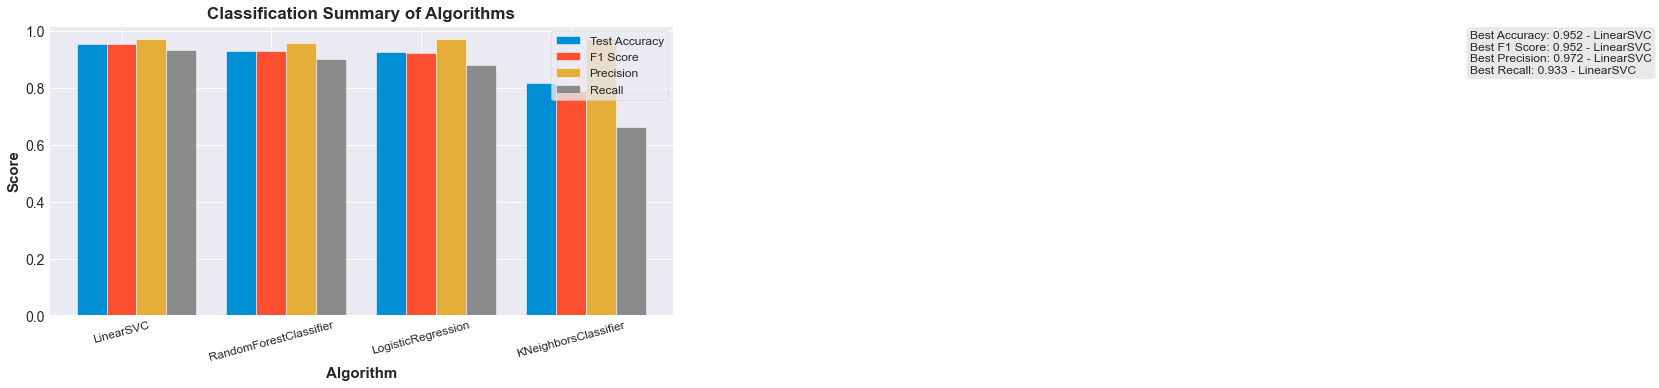

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))

barWidth = 0.2
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 15)
plt.ylabel('Score', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 12)
 
# Create legend & Show graphic
plt.legend(fontsize = 12)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=12,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);
print("click to zoom")

In [24]:
# I am testing my classifier and pre-processing stages

data = ["hello"]
count_vector = CountVectorizer(stop_words = 'english', lowercase = True,vocabulary=pickle.load(open("vector_vocabulary.pkl", "rb")))
data=count_vector.transform(data)
print(data)

  (0, 1031)	1


In [25]:
import pickle
trained_model=pickle.load(open("LinearSVC.pkl", 'rb'))

# print(testing_data)
print(trained_model.coef_.shape)

# print(X_test[0])
# print(testing_data[0][0])

print(trained_model.predict(data))

(1, 2393)
[0]


In [26]:
test = pd.read_csv('test.csv')

In [27]:
test


,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿
...,...,...,...,...,...
794,794,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...
795,795,_2viQ_Qnc689m-WiwOwvrQU7LvkLAgspnfXL8ovE0ME,TheHotChocolate,2013-07-13T18:26:37.017000,she is sooooo beautiful!
796,796,_2viQ_Qnc6_1Hq9MGlefkBIszt9rYD3S_CozADvMhQ4,Dinova Sharon,2013-07-13T14:44:00.700000,well done shakira
797,797,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...


In [28]:
test1 = test[['ID', 'CONTENT']]

In [29]:
test1

,ID,CONTENT
0,0,Hey guys check out my new channel and our firs...
1,1,just for test I have to say murdev.com
2,2,"Hey, check out my new website!! This site is a..."
3,3,i turned it on mute as soon is i came on i jus...
4,4,You should check my channel for Funny VIDEOS!!﻿
...,...,...
794,794,Hey Music Fans I really appreciate all of you ...
795,795,she is sooooo beautiful!
796,796,well done shakira
797,797,I love this song because we sing it at Camp al...


In [30]:
op= []
#value = combi['CONTENT'].apply(lambda x:x.split())
for i in test1['CONTENT']:
  
  data = [i]
  count_vector = CountVectorizer(stop_words = 'english', lowercase = True,vocabulary=pickle.load(open("vector_vocabulary.pkl", "rb")))
  data=count_vector.transform(data)
  trained_model=pickle.load(open("LinearSVC.pkl", 'rb'))
  #print(trained_model.predict(data))
  op.append(trained_model.predict(data).flatten().tolist()[0])
  #value['output'] = trained_model.predict(data)


 
 


In [31]:
test1['CLASS'] = op

<ipython-input-31-a577e08fe0d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['CLASS'] = op


In [32]:
test1

,ID,CONTENT,CLASS
0,0,Hey guys check out my new channel and our firs...,1
1,1,just for test I have to say murdev.com,1
2,2,"Hey, check out my new website!! This site is a...",1
3,3,i turned it on mute as soon is i came on i jus...,0
4,4,You should check my channel for Funny VIDEOS!!﻿,1
...,...,...,...
794,794,Hey Music Fans I really appreciate all of you ...,1
795,795,she is sooooo beautiful!,0
796,796,well done shakira,0
797,797,I love this song because we sing it at Camp al...,0


In [33]:
test1.drop('CONTENT', axis = 1, inplace = True)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
test1.set_index('ID', inplace = True)

In [35]:
# test1.to_csv('output.csv')

In [37]:
tp = test1

In [38]:
tp

,CLASS
ID,
0,1
1,1
2,1
3,0
4,1
...,...
794,1
795,0
796,0


In [45]:
sentiments =[]
for i in tp["CLASS"]:
    if i==1:
        sentiments.append('Positive')
    else:
        sentiments.append('Negative')

In [46]:
tp['SENTIMENT']=sentiments

<ipython-input-46-c684a85bc4e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp['SENTIMENT']=sentiments


In [49]:
tp.drop('CLASS', axis=1,inplace=True)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
tp.to_csv('final_output.csv')